# 학습 내용 : 최소제곱,평균제곱오차,다중선형회귀,로지스틱회귀

# 최소제곱

In [1]:
import numpy as np

#x값과 y값
x = [2, 4, 6, 8]
y = [81, 93, 91, 97]

#x와 y의 평균값
mx = np.mean(x)
my = np.mean(y)
print("x의 평균값 :", mx)
print("y의 평균값 :", my)

#기울기 공식의 분모 : (x-x평균)의 합의 제곱
divisor = sum([(mx - i)**2 for i in x])

x의 평균값 : 5.0
y의 평균값 : 90.5


In [2]:
#기울기 공식의 분자 : (x-x평균)(y-y평균)의 합
def top(x, mx, y, my):
    d = 0
    for i in range(len(x)):
        d += (x[i]-mx)*(y[i]-my)
    return d
dividend = top(x, mx, y, my)    #위의 top함수값 입력

print("분모 :", divisor)
print("분자 :", dividend)

#기울기와 y절편 구하기
a = dividend / divisor
b = my - (mx*a)

#출력으로 확인
print("기울기 a =", a)
print("y절편 b =", b)

분모 : 20.0
분자 : 46.0
기울기 a = 2.3
y절편 b = 79.0


### 기울기 공식의 분자를 함수가 아니라 sum으로 만들어보기

In [4]:
sum_dividend = sum([(mx - x[i]) * (my - y[i]) for i in range(len(x))])

print("분모 :", divisor)
print("분자 :", sum_dividend)

#기울기와 y 절편 구하기
a = sum_dividend / divisor
b = my - (mx*a)

#출력으로 확인
print("기울기 a =", a)
print("y절편 b =", b)

분모 : 20.0
분자 : 46.0
기울기 a = 2.3
y절편 b = 79.0


# 평균 제곱근 오차

In [1]:
import numpy as np

#기울기 a와 y절편 b
ab = [3, 76]

#x, y의 데이터 값
data = [[2, 81], [4, 93], [6, 91], [8, 97]]
x = [i[0] for i in data]
y = [i[1] for i in data]

#y = ax + b에 a와 b 값을 대입하여 결과를 출력하는 함수
def predict(x):
    return ab[0] * x + ab[1]

In [2]:
#RMSE 함수
def rmse(p, a):
    return np.sqrt(((p - a) ** 2).mean())

#RMSE 함수를 각 y 값에 대입하여 최종 값을 구하는 함수
def rmse_val(predict_result, y):
    return rmse(np.array(predict_result), np.array(y))

#예측 값이 들어갈 빈 리스트
predict_result = []

#모든 x 값을 한 번씩 대입하여
for i in range(len(x)):
    #predict_result리스트를 완성한다
    predict_result.append(predict(x[i]))
    print("공부한 시간 = %.f, 실제 점수 = %.f, 예측 점수 = %.f" %(x[i], y[i], predict(x[i])))

공부한 시간 = 2, 실제 점수 = 81, 예측 점수 = 82
공부한 시간 = 4, 실제 점수 = 93, 예측 점수 = 88
공부한 시간 = 6, 실제 점수 = 91, 예측 점수 = 94
공부한 시간 = 8, 실제 점수 = 97, 예측 점수 = 100


In [4]:
#for문을 통해 만들어진 예측값과 실제값 확인해보기
print(predict_result)
print(y)

#최종 RMSE 출력
print('rmse 최종값 :' + str(rmse_val(predict_result, y)))

[82, 88, 94, 100]
[81, 93, 91, 97]
rmse 최종값 :3.3166247903554


# 경사 하강법

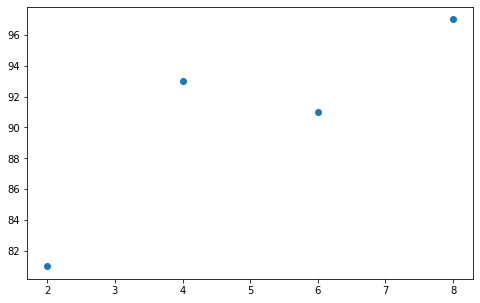

epoch=0, 기울기=9.2800, 절편=1.8100
epoch=100, 기울기=11.5301, 절편=23.9186
epoch=200, 기울기=8.9703, 절편=39.1944
epoch=300, 기울기=7.1204, 절편=50.2337
epoch=400, 기울기=5.7836, 절편=58.2115
epoch=500, 기울기=4.8175, 절편=63.9768
epoch=600, 기울기=4.1193, 절편=68.1432
epoch=700, 기울기=3.6148, 절편=71.1541
epoch=800, 기울기=3.2501, 절편=73.3300
epoch=900, 기울기=2.9866, 절편=74.9025
epoch=1000, 기울기=2.7962, 절편=76.0388
epoch=1100, 기울기=2.6586, 절편=76.8601
epoch=1200, 기울기=2.5591, 절편=77.4535
epoch=1300, 기울기=2.4873, 절편=77.8824
epoch=1400, 기울기=2.4353, 절편=78.1924
epoch=1500, 기울기=2.3978, 절편=78.4163
epoch=1600, 기울기=2.3707, 절편=78.5782
epoch=1700, 기울기=2.3511, 절편=78.6952
epoch=1800, 기울기=2.3369, 절편=78.7797
epoch=1900, 기울기=2.3267, 절편=78.8408
epoch=2000, 기울기=2.3193, 절편=78.8850


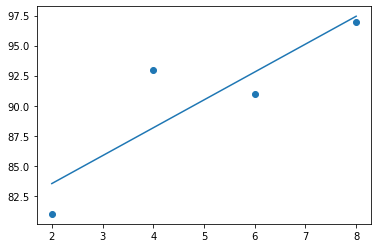

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#공부 시간 x와 성적 y의 리스트 만들기
data = [[2, 81], [4, 93], [6, 91], [8, 97]]
x = [i[0] for i in data]
y = [i[1] for i in data]

#그래프로 나타내기
plt.figure(figsize=(8, 5))    #그래프 영역 지정
plt.scatter(x, y)    #산점도 그래프를 표현하는 함수
plt.show()    #실제 화면에 표시해주는 함수

#리스트로 되어있는 x와 y값을 넘파이 배열로 바꾸기
#(인덱스를 주어 하나씩 불러와 계산이 가능하게 하기 위함)
x_data = np.array(x)
y_data = np.array(y)

#기울기 a와 절편 b의 값 초기화
a = 0
b = 0

#학습률 정하기
lr = 0.01

#몇 번 반복될지 설정(0부터 세므로 원하는 반복 횟수 + 1)
epochs = 2001

#경사 하강법 시작
for i in range(epochs):    #에포크 수만큼 반복
    y_pred = a * x_data + b    #y를 구하는 식 세우기
    #오차 함수를 a로 미분한 값
    a_diff = 2/len(x_data) * sum((a * x_data + b - y_data) * x_data)
    #오차 함수를 b로 미분한 값
    b_diff = 2/len(x_data) * sum(a * x_data + b - y_data)
    
    a = a - lr * a_diff    #학습률을 곱해 기존의 a값 업데이트
    b = b - lr * b_diff    #학습률을 곱해 기존의 b값 업데이트
    
    if i % 100 == 0:    #100번 반복될 때마다 현재의 a값, b값 출력
        print('epoch=%.f, 기울기=%.04f, 절편=%.04f' %(i, a, b))
        
#앞서 구한 기울기와 절편을 이용해 그래프를 다시 그리기
y_pred = a * x_data + b
plt.scatter(x, y)
plt.plot([min(x_data), max(x_data)], [min(y_pred), max(y_pred)])
plt.show()

# 다중 선형 회귀

In [2]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

#x1, x2, y의 데이터 값
data = [[2, 0, 81], [4, 4, 93], [6, 2, 91], [8, 3, 97]]
x1 = [x_row1[0] for x_row1 in data]
x2 = [x_row2[1] for x_row2 in data]    #새로 추가되는 값
y_data = [y_row[2] for y_row in data]

#기울기 a와 y절편 b의 값을 임의로 정한다
#단, 기울기의 범위는 0 ~ 10 사이이며, y절편은 0 ~ 100 사이에서 변하게 한다
a1 = tf.Variable(tf.random_uniform([1], 0, 10, dtype=tf.float64, seed=0))
b = tf.Variable(tf.random_uniform([1], 0, 100, dtype=tf.float64, seed=0))
#새로 추가되는 값
a2 = tf.Variable(tf.random_uniform([1], 0, 10, dtype=tf.float64, seed=0))

#새로운 방정식
y = a1 * x1 + a2 * x2 + b
#텐서플로 RMSE 함수
rmse = tf.sqrt(tf.reduce_mean(tf.square(y - y_data)))
#학습률 값
learning_rate = 0.1
#RMSE 값을 최소로 하는 값 찾기
gradient_decent = tf.train.GradientDescentOptimizer(learning_rate).minimize(rmse)

#학습이 진행되는 부분
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(2001):
        sess.run(gradient_decent)
        if step % 100 == 0:
            print("Epoch : %.f, RMSE = %.04f, 기울기 a1 = %.4f, 기울기 a2 = %.4f, y절편 b = %.4f"
                 % (step, sess.run(rmse), sess.run(a1), sess.run(a2), sess.run(b)))

Epoch : 0, RMSE = 49.1842, 기울기 a1 = 7.5270, 기울기 a2 = 7.8160, y절편 b = 80.5980
Epoch : 100, RMSE = 1.8368, 기울기 a1 = 1.1306, 기울기 a2 = 2.1316, y절편 b = 78.5119
Epoch : 200, RMSE = 1.8370, 기울기 a1 = 1.1879, 기울기 a2 = 2.1487, y절편 b = 78.1057
Epoch : 300, RMSE = 1.8370, 기울기 a1 = 1.2122, 기울기 a2 = 2.1571, y절편 b = 77.9352
Epoch : 400, RMSE = 1.8370, 기울기 a1 = 1.2226, 기울기 a2 = 2.1607, y절편 b = 77.8636
Epoch : 500, RMSE = 1.8370, 기울기 a1 = 1.2269, 기울기 a2 = 2.1622, y절편 b = 77.8335
Epoch : 600, RMSE = 1.8370, 기울기 a1 = 1.2288, 기울기 a2 = 2.1628, y절편 b = 77.8208
Epoch : 700, RMSE = 1.8370, 기울기 a1 = 1.2295, 기울기 a2 = 2.1631, y절편 b = 77.8155
Epoch : 800, RMSE = 1.8370, 기울기 a1 = 1.2299, 기울기 a2 = 2.1632, y절편 b = 77.8133
Epoch : 900, RMSE = 1.8370, 기울기 a1 = 1.2300, 기울기 a2 = 2.1632, y절편 b = 77.8124
Epoch : 1000, RMSE = 1.8370, 기울기 a1 = 1.2301, 기울기 a2 = 2.1633, y절편 b = 77.8120
Epoch : 1100, RMSE = 1.8370, 기울기 a1 = 1.2301, 기울기 a2 = 2.1633, y절편 b = 77.8118
Epoch : 1200, RMSE = 1.8370, 기울기 a1 = 1.2301, 기울기 a2 = 2.1633, 

### 다중 선형 회귀 - data 확인

In [3]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(2001):
        sess.run(gradient_decent)
        if step % 10 == 0:
            print("Epoch : %.f, RMSE = %.04f, 기울기 a1 = %.4f, 기울기 a2 = %.4f, y절편 b = %.4f"
                 % (step, sess.run(rmse), sess.run(a1), sess.run(a2), sess.run(b)))
            z = sess.run(y)
            print("R1 = %d...R2 = %d...R3 = %d...R4 = %d" %(z[0],z[1],z[2],z[3]))

Epoch : 0, RMSE = 49.1842, 기울기 a1 = 7.5270, 기울기 a2 = 7.8160, y절편 b = 80.5980
R1 = 95...R2 = 141...R3 = 141...R4 = 164
Epoch : 10, RMSE = 12.8912, 기울기 a1 = 2.1511, 기울기 a2 = 5.2510, y절편 b = 79.6774
R1 = 83...R2 = 109...R3 = 103...R4 = 112
Epoch : 20, RMSE = 1.9061, 기울기 a1 = 0.6524, 기울기 a2 = 3.6177, y절편 b = 79.2984
R1 = 80...R2 = 96...R3 = 90...R4 = 95
Epoch : 30, RMSE = 0.9554, 기울기 a1 = 1.0296, 기울기 a2 = 2.6688, y절편 b = 79.1357
R1 = 81...R2 = 93...R3 = 90...R4 = 95
Epoch : 40, RMSE = 1.8486, 기울기 a1 = 0.9776, 기울기 a2 = 2.3115, y절편 b = 78.9877
R1 = 80...R2 = 92...R3 = 89...R4 = 93
Epoch : 50, RMSE = 1.8379, 기울기 a1 = 1.0386, 기울기 a2 = 2.2071, y절편 b = 78.8912
R1 = 80...R2 = 91...R3 = 89...R4 = 93
Epoch : 60, RMSE = 1.8369, 기울기 a1 = 1.0728, 기울기 a2 = 2.1605, y절편 b = 78.8020
R1 = 80...R2 = 91...R3 = 89...R4 = 93
Epoch : 70, RMSE = 1.8367, 기울기 a1 = 1.0943, 기울기 a2 = 2.1406, y절편 b = 78.7199
R1 = 80...R2 = 91...R3 = 89...R4 = 93
Epoch : 80, RMSE = 1.8367, 기울기 a1 = 1.1093, 기울기 a2 = 2.1331, y절편 b = 78.6

Epoch : 1410, RMSE = 1.8370, 기울기 a1 = 1.2301, 기울기 a2 = 2.1633, y절편 b = 77.8117
R1 = 80...R2 = 91...R3 = 89...R4 = 94
Epoch : 1420, RMSE = 1.8370, 기울기 a1 = 1.2301, 기울기 a2 = 2.1633, y절편 b = 77.8117
R1 = 80...R2 = 91...R3 = 89...R4 = 94
Epoch : 1430, RMSE = 1.8370, 기울기 a1 = 1.2301, 기울기 a2 = 2.1633, y절편 b = 77.8117
R1 = 80...R2 = 91...R3 = 89...R4 = 94
Epoch : 1440, RMSE = 1.8370, 기울기 a1 = 1.2301, 기울기 a2 = 2.1633, y절편 b = 77.8117
R1 = 80...R2 = 91...R3 = 89...R4 = 94
Epoch : 1450, RMSE = 1.8370, 기울기 a1 = 1.2301, 기울기 a2 = 2.1633, y절편 b = 77.8117
R1 = 80...R2 = 91...R3 = 89...R4 = 94
Epoch : 1460, RMSE = 1.8370, 기울기 a1 = 1.2301, 기울기 a2 = 2.1633, y절편 b = 77.8117
R1 = 80...R2 = 91...R3 = 89...R4 = 94
Epoch : 1470, RMSE = 1.8370, 기울기 a1 = 1.2301, 기울기 a2 = 2.1633, y절편 b = 77.8117
R1 = 80...R2 = 91...R3 = 89...R4 = 94
Epoch : 1480, RMSE = 1.8370, 기울기 a1 = 1.2301, 기울기 a2 = 2.1633, y절편 b = 77.8117
R1 = 80...R2 = 91...R3 = 89...R4 = 94
Epoch : 1490, RMSE = 1.8370, 기울기 a1 = 1.2301, 기울기 a2 = 2.1633, y

### 다중 선형회귀 - 단순 선형 회귀와 결과 비교

In [6]:
m_a1 = 1.2301
m_a2 = 2.1633
m_b = 77.8117
m_result_y = []
for i in range(4):
    m_result_y.append(m_a1*x1[i] + m_a2*x2[i] + m_b)
print(m_result_y)
m_avr = sum(m_result_y) / 4
print("다중 선형회귀의 점수 평균 :", m_avr)

m_diff_y = []
for i in range(4):
    m_diff_y.append(abs(y_data[i] - m_result_y[i]))
avr_d1 = sum(m_diff_y) / 4
print("다중 선형회귀의 오차 평균 :", avr_d1)

s_a1 = 2.3
s_b = 79
s_result_y = []
for i in range(4):
    s_result_y.append(s_a1 * x1[i] + s_b)
print(s_result_y)
s_avr2 = sum(s_result_y) / 4
print("단순 선형회귀의 점수 평균 :", s_avr2)

s_diff_y = []
for i in range(4):
    s_diff_y.append(abs(y_data[i] - s_result_y[i]))
avr_d2 = sum(s_diff_y) / 4
print(avr_d2)
print("단순 선형회귀의 오차 평균 :", avr_d2)

[80.2719, 91.3853, 89.5189, 94.14240000000001]
다중 선형회귀의 점수 평균 : 88.82962500000001
다중 선형회귀의 오차 평균 : 1.6703749999999964
[83.6, 88.2, 92.8, 97.4]
단순 선형회귀의 점수 평균 : 90.5
2.3999999999999986
단순 선형회귀의 오차 평균 : 2.3999999999999986


In [8]:
import numpy as np
data = [[2, 0, 81], [4, 4, 93], [6, 2, 91], [8, 3, 97]]
x1 = np.array([x_row1[0] for x_row1 in data], dtype='f')
x2 = np.array([x_row2[1] for x_row2 in data], dtype='f')
y = np.array([y_row[2] for y_row in data], dtype='f')

m_a1 = 1.2301
m_a2 = 2.1633
m_b = 77.8117
m_y2 = m_a1 * x1 + m_a2 * x2 + m_b
print("다중 선형회귀의 점수 평균 :", m_y2.mean())
m_diff_y = abs(y - m_y2)
print("다중 선형회귀의 오차 평균 :", m_diff_y.mean())

s_a1 = 2.3
s_b = 79
s_y1 = s_a1 * x1 + s_b
print("단순 선형회귀의 점수 평균 :", s_y1.mean())
s_diff_y = abs(y - s_y1)
print("단순 선형회귀의 오차 평균 :", s_diff_y.mean())

다중 선형회귀의 점수 평균 : 88.82962
다중 선형회귀의 오차 평균 : 1.6703777
단순 선형회귀의 점수 평균 : 90.49999
단순 선형회귀의 오차 평균 : 2.4000015


# 로지스틱 회귀

In [15]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np

#x, y의 데이터 값
data = [[2,0], [4,0], [6,0], [8,1], [10,1], [12,1], [14,1]]
x_data = [x_row[0] for x_row in data]
y_data = [y_row[1] for y_row in data]

#a와 b의 값을 임의로 정한다
a = tf.Variable(tf.random_normal([1], dtype=tf.float64, seed=0))
b = tf.Variable(tf.random_normal([1], dtype=tf.float64, seed=0))

#y 시그모이드 함수의 방정식을 세운다
y = 1 / (1 + np.e**-(a * x_data + b))

#loss를 구하는 함수
loss = -tf.reduce_mean(np.array(y_data) * tf.log(y) + (1 - np.array(y_data)) * tf.log(1 - y))

#학습률 값
learning_rate = 0.5

#loss를 최소로 하는 값 찾기
gradient_decent = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

#학습
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(60001):
        sess.run(gradient_decent)
        if i % 6000 == 0:
            print("Epoch : %.f, loss = %.4f, 기울기 a = %.4f, y절편 = %.4f"
                 % (i, sess.run(loss), sess.run(a), sess.run(b)))

Epoch : 0, loss = 4.0817, 기울기 a = 2.4706, y절편 = -0.3620
Epoch : 6000, loss = 0.0152, 기울기 a = 2.9230, y절편 = -20.3114
Epoch : 12000, loss = 0.0081, 기울기 a = 3.5648, y절편 = -24.8081
Epoch : 18000, loss = 0.0055, 기울기 a = 3.9564, y절편 = -27.5511
Epoch : 24000, loss = 0.0041, 기울기 a = 4.2385, y절편 = -29.5268
Epoch : 30000, loss = 0.0033, 기울기 a = 4.4590, y절편 = -31.0705
Epoch : 36000, loss = 0.0028, 기울기 a = 4.6399, y절편 = -32.3371
Epoch : 42000, loss = 0.0024, 기울기 a = 4.7933, y절편 = -33.4107
Epoch : 48000, loss = 0.0021, 기울기 a = 4.9263, y절편 = -34.3424
Epoch : 54000, loss = 0.0019, 기울기 a = 5.0439, y절편 = -35.1653
Epoch : 60000, loss = 0.0017, 기울기 a = 5.1491, y절편 = -35.9020


### tensorflow V2.x
### 여기서는 v1으로 이미 실행해서 안될거다. 코드만 참고할 것

In [16]:
import tensorflow as tf
import numpy as np

#x, y의 데이터 값
data = [[2,0], [4,0], [6,0], [8,1], [10,1], [12,1], [14,1]]
x_data = [x_row[0] for x_row in data]
y_data = [y_row[1] for y_row in data]

#a와 b의 값을 임의로 정한다
a = tf.Variable(tf.random.normal([1], dtype=tf.float64, seed=0))
b = tf.Variable(tf.random.normal([1], dtype=tf.float64, seed=0))

def hypothesis(a, b):    #시그모이드 함수의 방정식을 세움
    return 1/(1 + np.e**-(a*x_data + b))
def cost(a, b):    #loss를 구하는 함수
    return -tf.reduce_mean(np.array(y_data) * tf.math.log(hypothesis(a,b))
                          + (1 - np.array(y_data)) * tf.math.log(1 - hypothesis(a, b)))
def costFunc():
    return -tf.reduce_mean(np.array(y_data) * tf.math.log(hypothesis(a, b))
                          + (1 - np.array(y_data)) * tf.math.log(1 - hypothesis(a,b)))

#RMSE 값을 최소로 하는 값 찾기
opt = tf.keras.optimizers.SGD(learning_rate=0.5)
for i in range(60001):    #steps
    opt.minimize(costFunc, var_list=[a,b])
    if i % 6000 == 0:
        print(i, f'{cost(a,b)}, {a.numpy()}, {b.numpy()}')

NotImplementedError: numpy() is only available when eager execution is enabled.